In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from seaborn import countplot, kdeplot
from tqdm import tqdm
from seaborn import heatmap
import scipy.stats as scs

In [206]:
df_train = pd.read_csv('train_data.csv')

In [207]:
df_train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [208]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [209]:
df_train['Admission_Deposit'].var()

np.float64(1181082.6254793175)

In [210]:
df_train['Hospital_type_code'].unique().shape[0]

7

In [211]:
df_train['case_id'].sort_values()

0              1
1              2
2              3
3              4
4              5
           ...  
318433    318434
318434    318435
318435    318436
318436    318437
318437    318438
Name: case_id, Length: 318438, dtype: int64

In [212]:


def plot_dists(df: pd.DataFrame):

    categorical_limit = 18 # this is a totally arbritray number

    col_names = df.columns

    for col_name in tqdm(col_names):
    
        # fig, ax = plt.subplots()

        col = df[col_name]
        fig, ax = plt.subplots(figsize=(15, 10))
        
        print(col_name)

        # check to see if data is categorical

        # if col_name in ['Stay, Age']:
        #     x=col.sort_values()
        # else:
        #     x=col
        
        if col.unique().shape[0] < 50:
            countplot(ax=ax, x=col.sort_values(), data=df, palette='rocket', align='edge', width=0.3, hue=col.sort_values(), legend=False)
        else:
            kdeplot(ax=ax, x=col, data=df)

    # if column[0].unique().shape[0] < 50: # if <50, assume categorical
        
    #     countplot(ax=ax, x=column.sort_values(), data=column)

<Axes: xlabel='Admission_Deposit', ylabel='Density'>

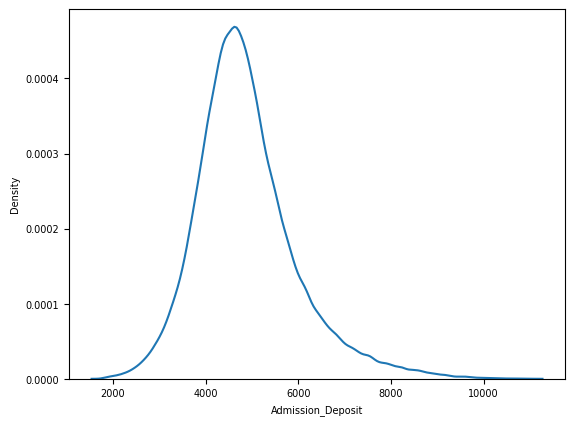

In [213]:
kdeplot(x=df_train['Admission_Deposit'], data=df_train)

  0%|          | 0/16 [00:00<?, ?it/s]

Hospital_code


  6%|▋         | 1/16 [00:00<00:12,  1.19it/s]

Hospital_type_code


 12%|█▎        | 2/16 [00:02<00:14,  1.05s/it]

City_Code_Hospital


 19%|█▉        | 3/16 [00:02<00:11,  1.13it/s]

Hospital_region_code


 25%|██▌       | 4/16 [00:03<00:11,  1.00it/s]

Available Extra Rooms in Hospital


 31%|███▏      | 5/16 [00:04<00:10,  1.09it/s]

Department


 38%|███▊      | 6/16 [00:06<00:10,  1.07s/it]

Ward_Type


 44%|████▍     | 7/16 [00:07<00:09,  1.11s/it]

Ward_Facility_Code


 50%|█████     | 8/16 [00:08<00:09,  1.16s/it]

Bed Grade


 56%|█████▋    | 9/16 [00:09<00:07,  1.06s/it]

City_Code_Patient


 62%|██████▎   | 10/16 [00:10<00:06,  1.06s/it]

Type of Admission


 69%|██████▉   | 11/16 [00:11<00:05,  1.14s/it]

Severity of Illness


 75%|███████▌  | 12/16 [00:13<00:04,  1.19s/it]

Visitors with Patient


 81%|████████▏ | 13/16 [00:13<00:03,  1.07s/it]

Age


 88%|████████▊ | 14/16 [00:15<00:02,  1.17s/it]

Admission_Deposit


 94%|█████████▍| 15/16 [00:16<00:01,  1.31s/it]

Stay


100%|██████████| 16/16 [00:18<00:00,  1.14s/it]


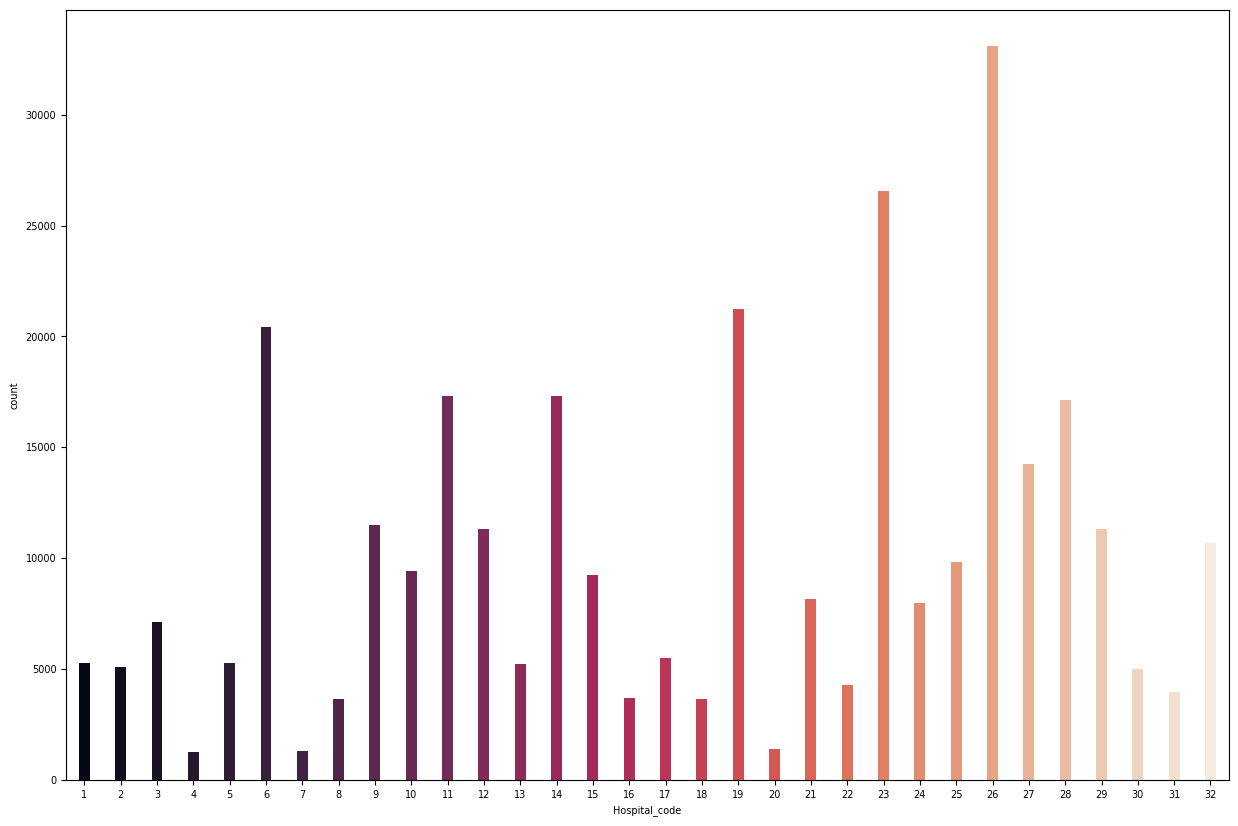

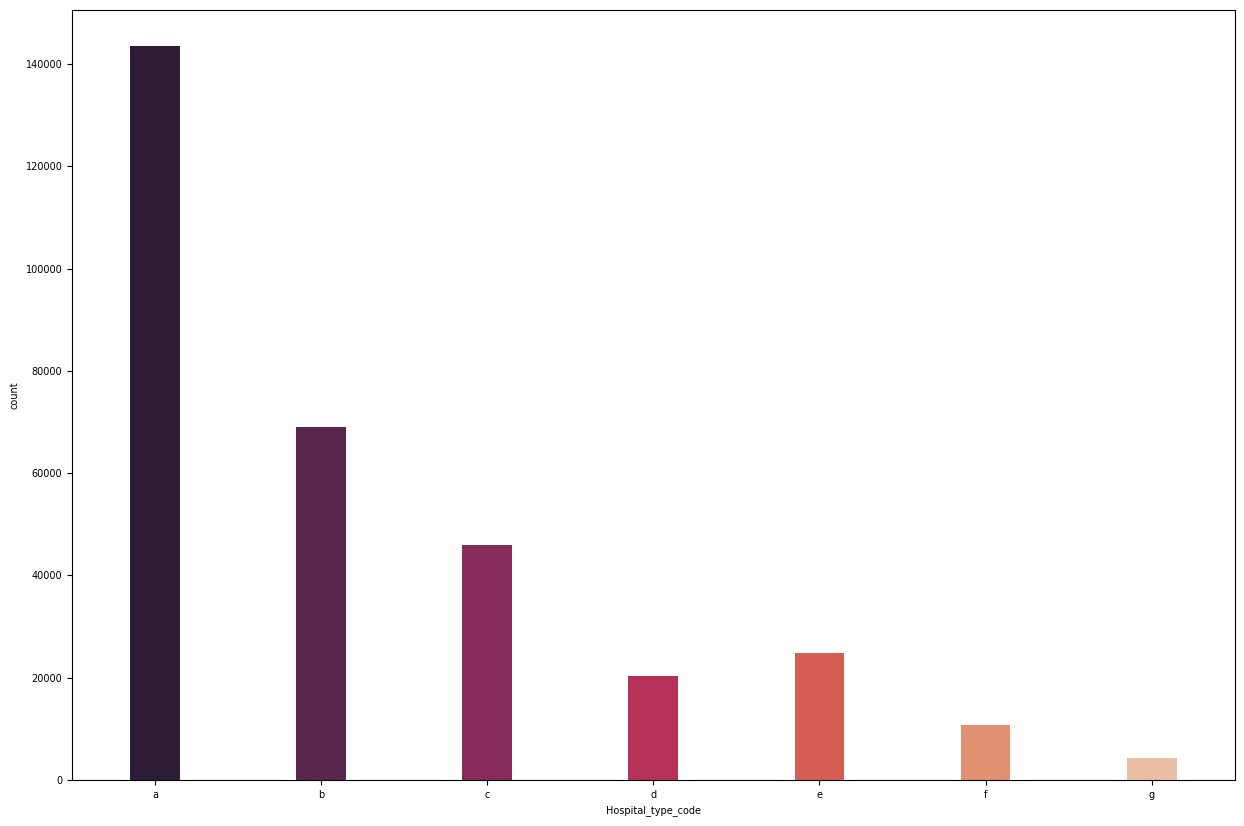

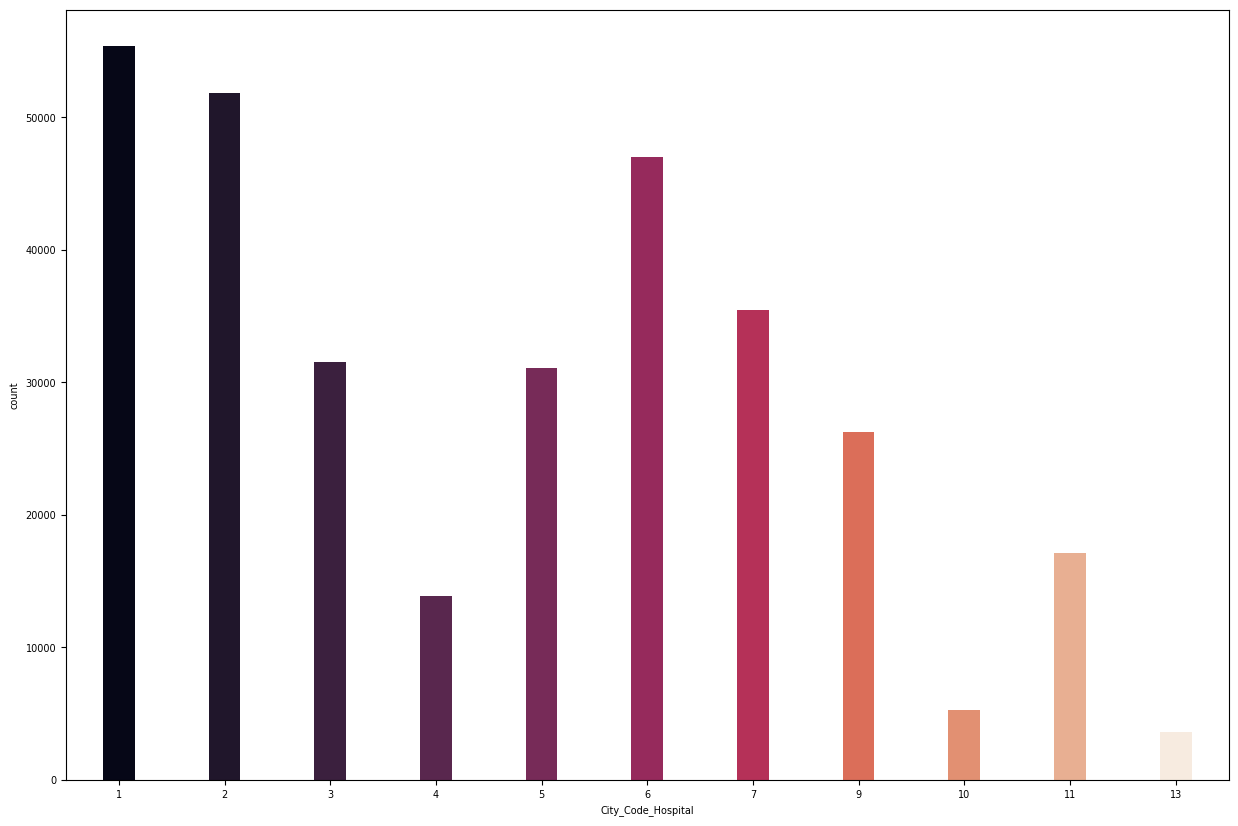

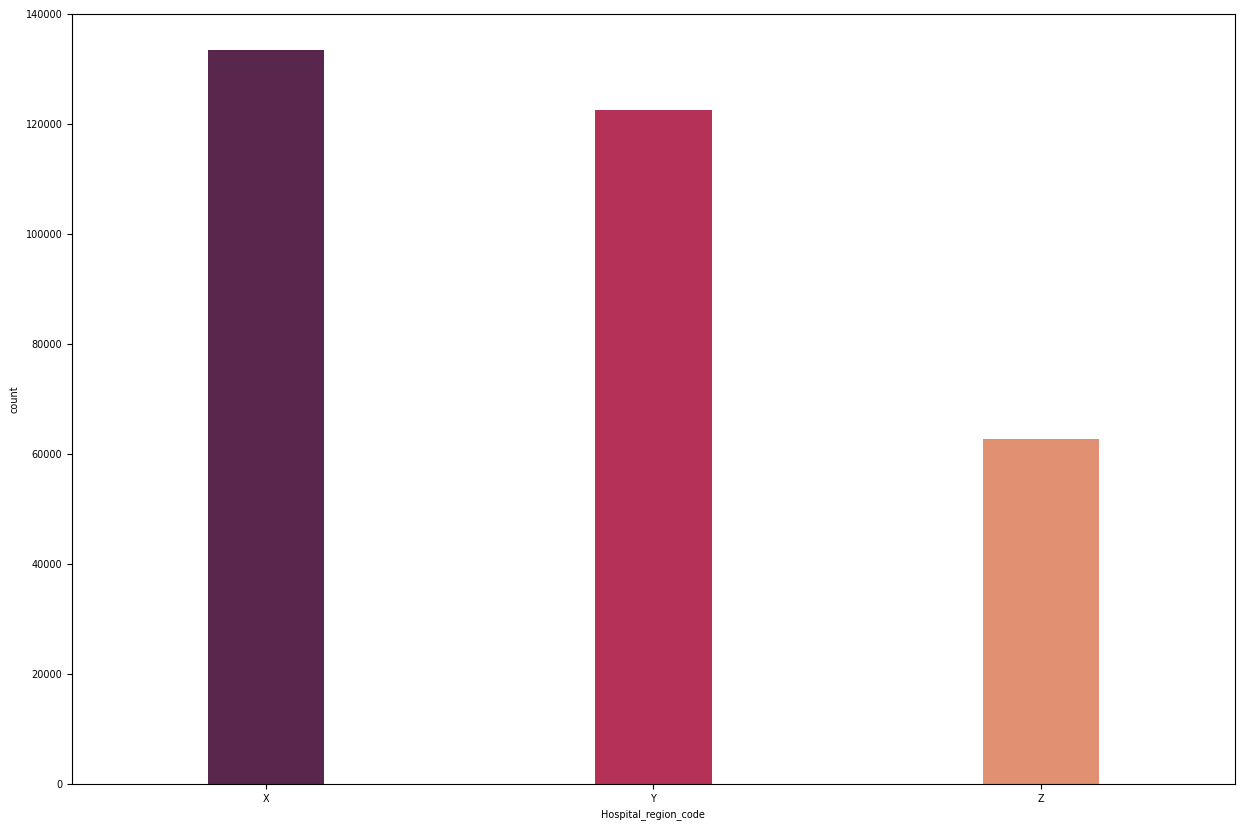

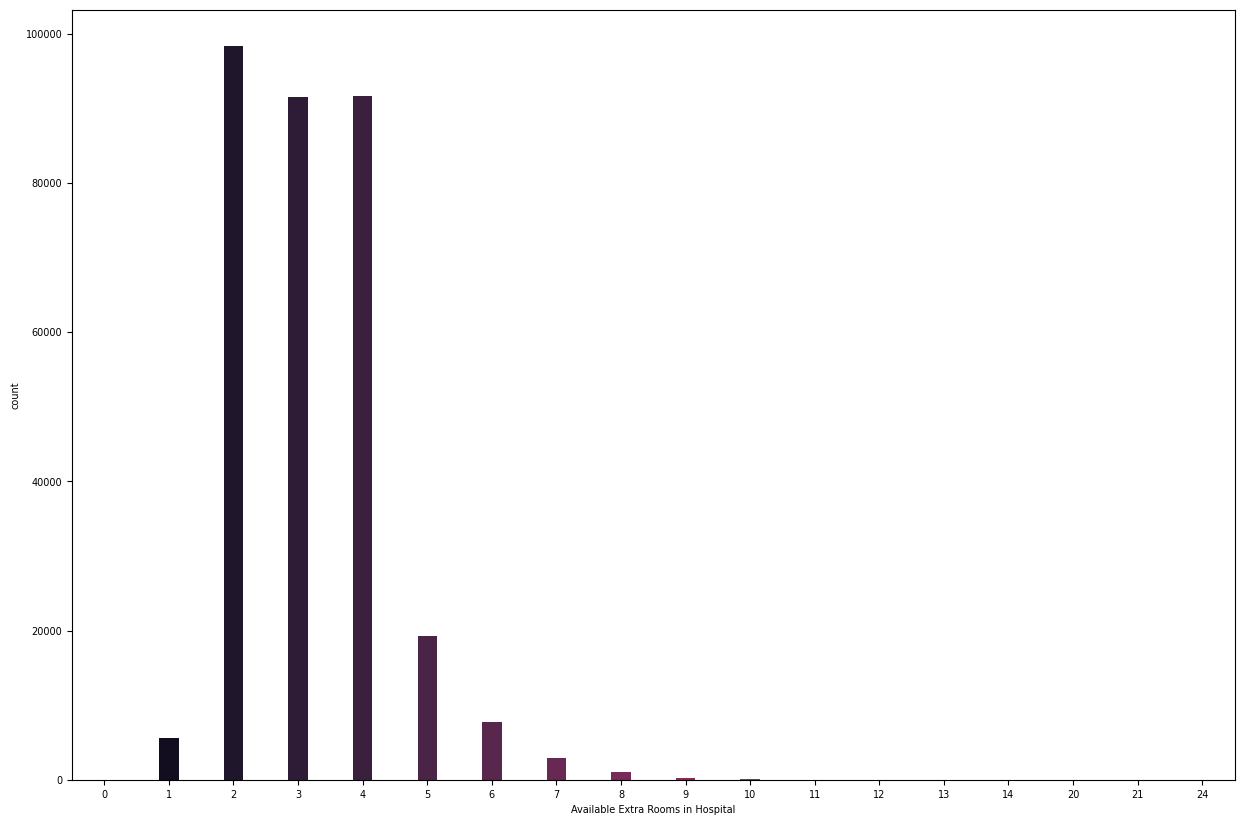

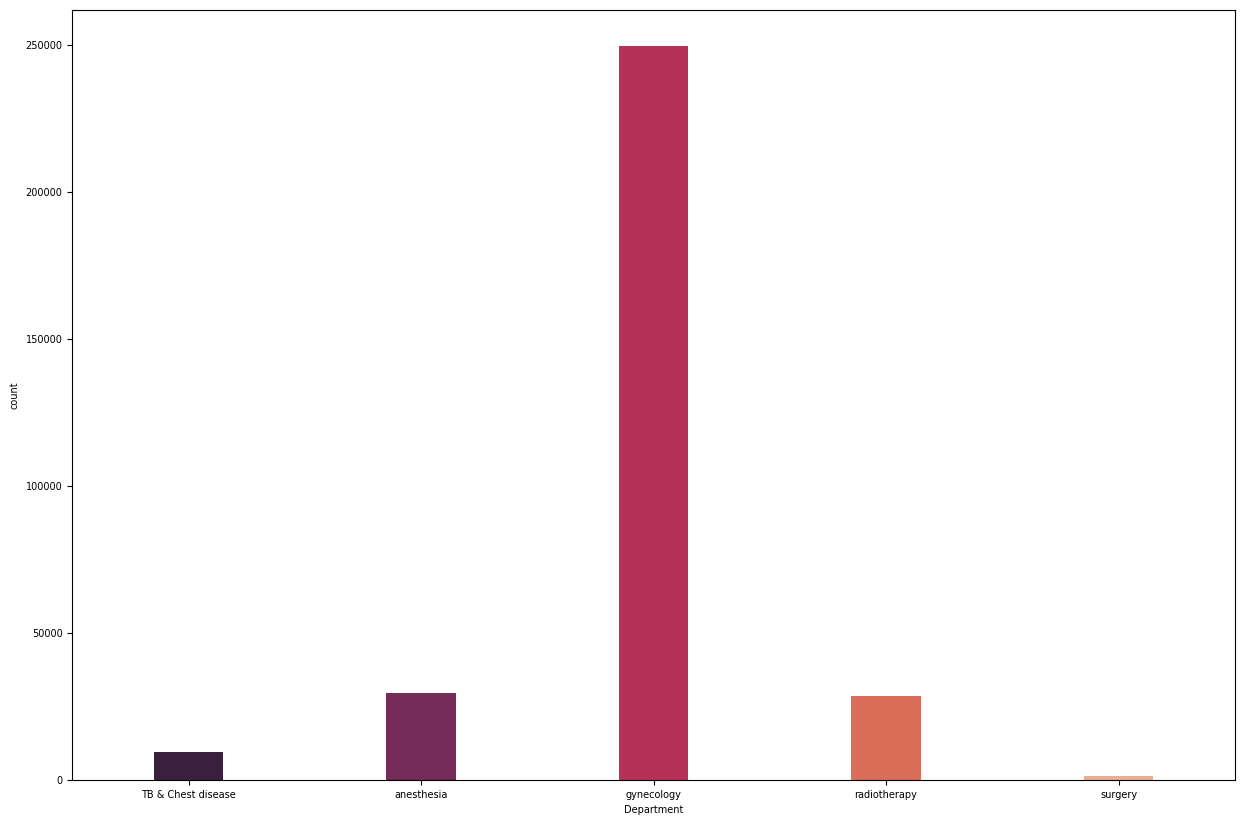

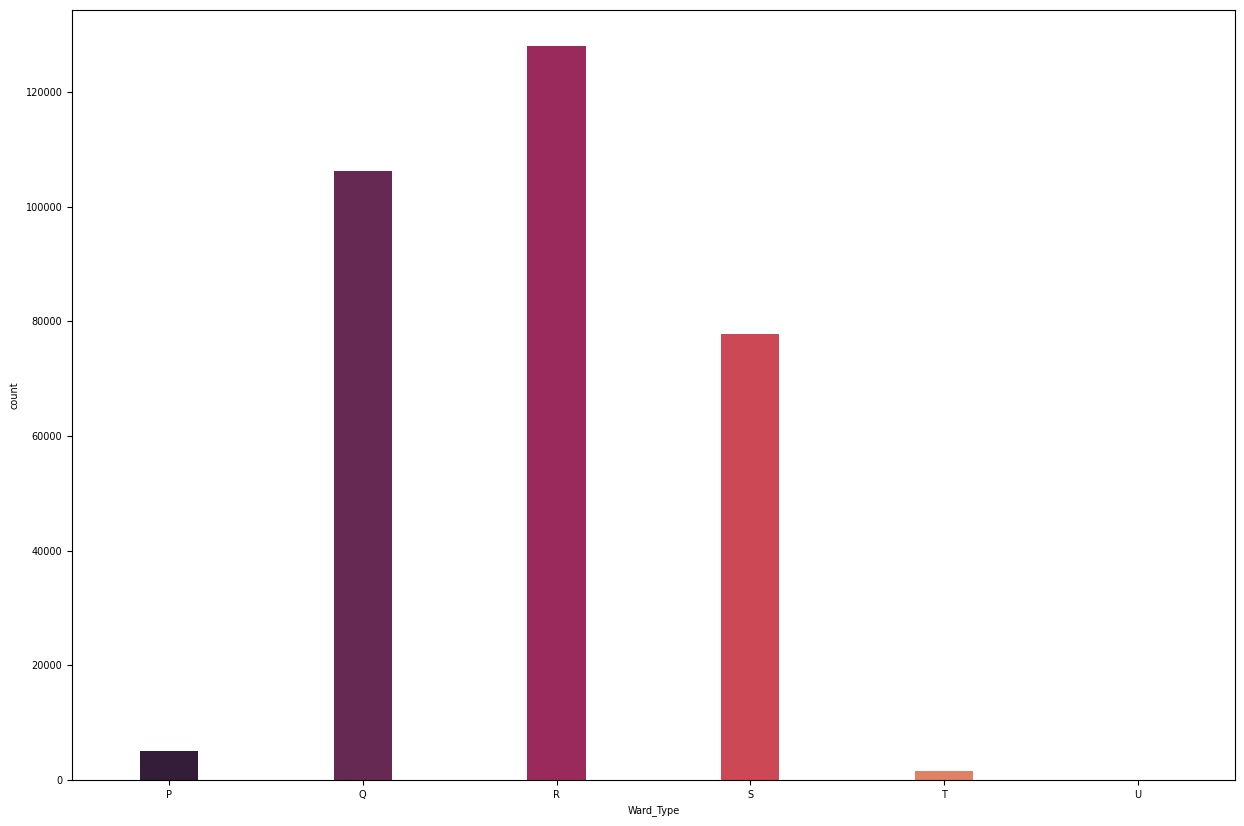

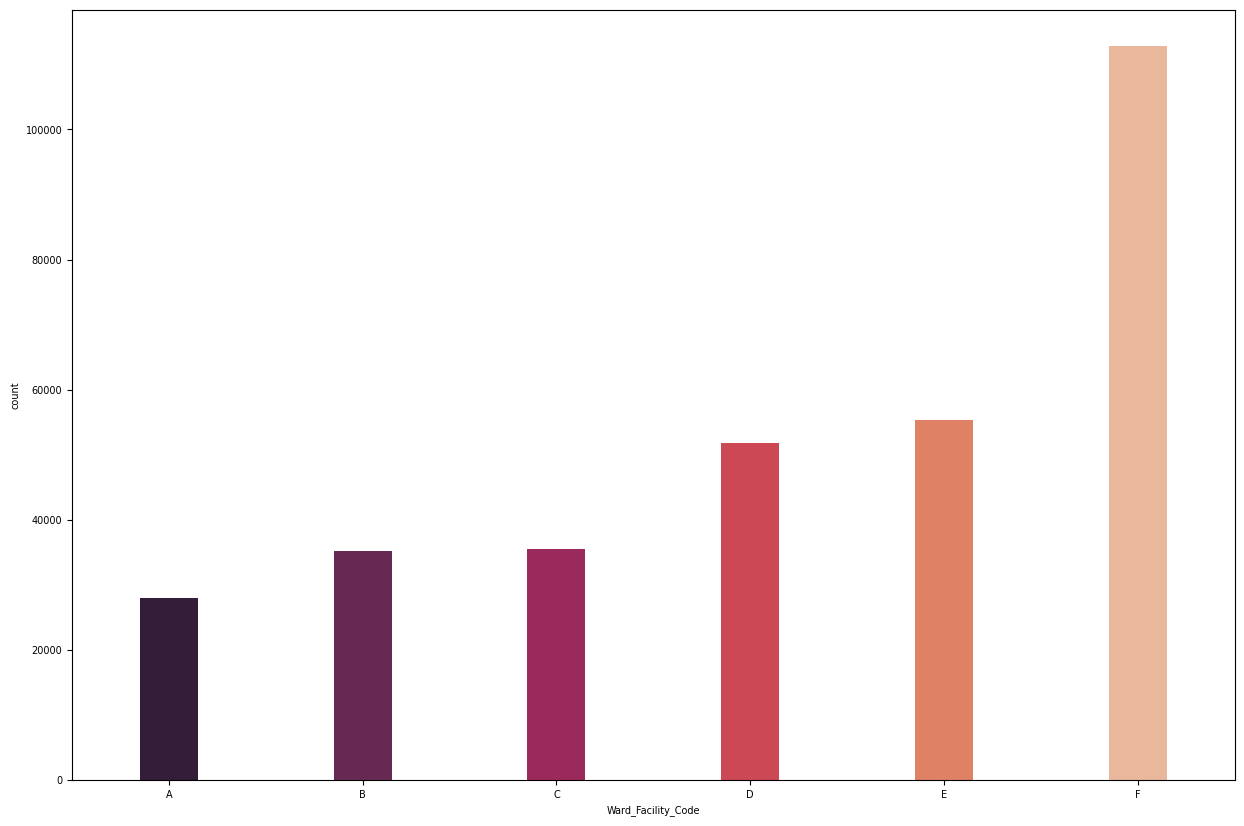

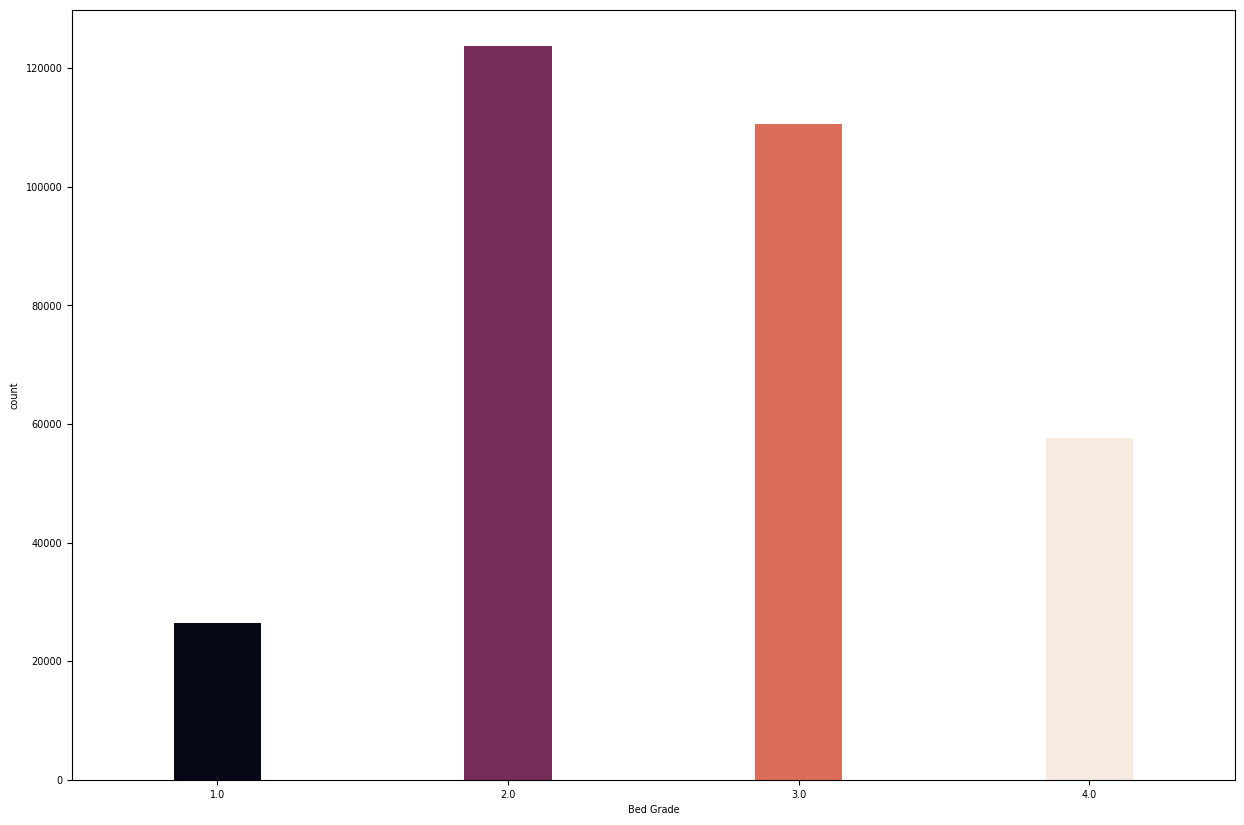

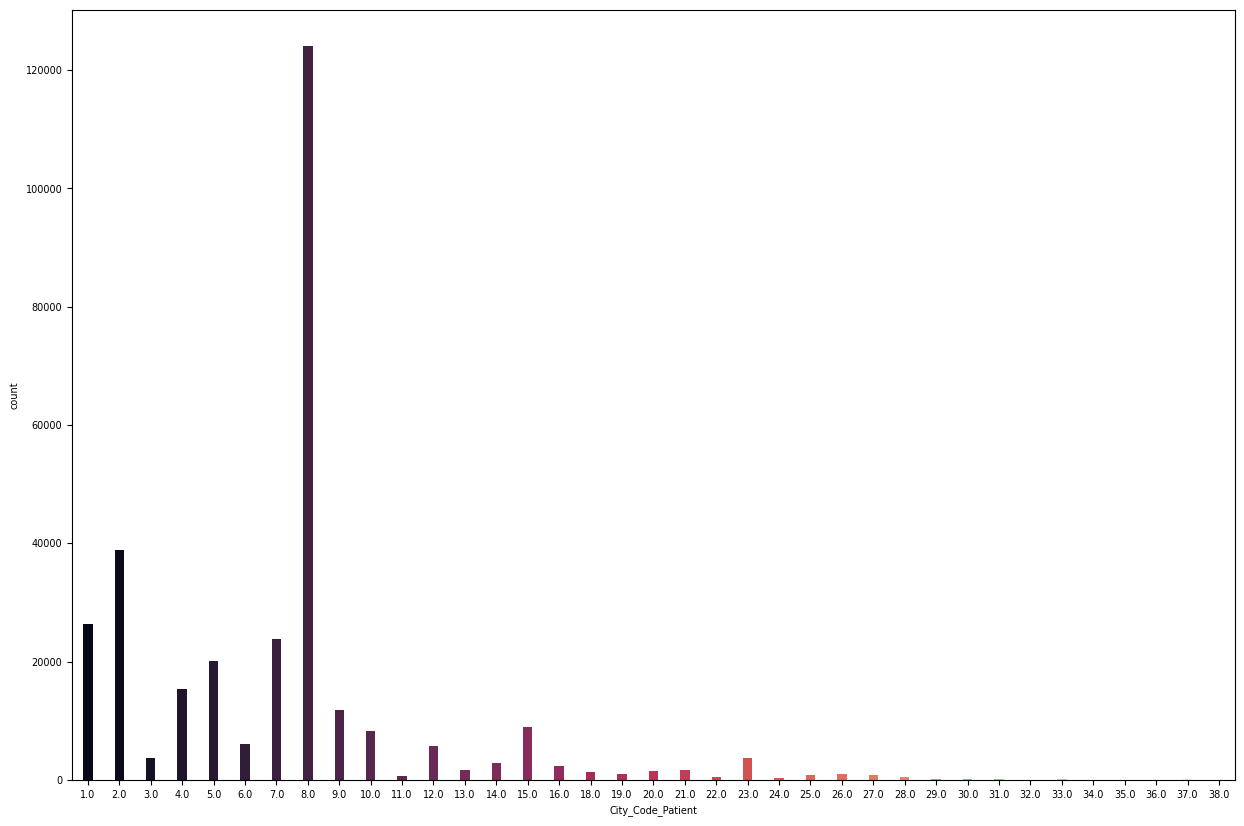

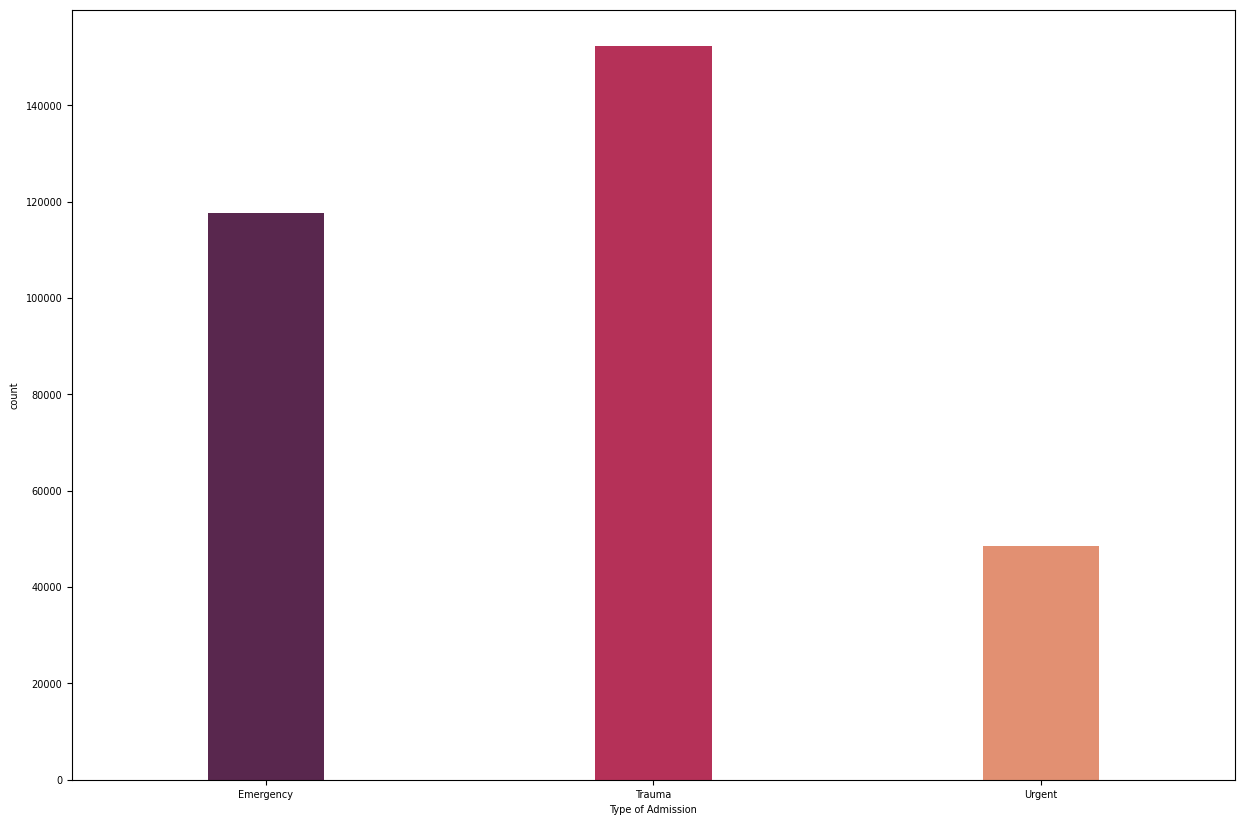

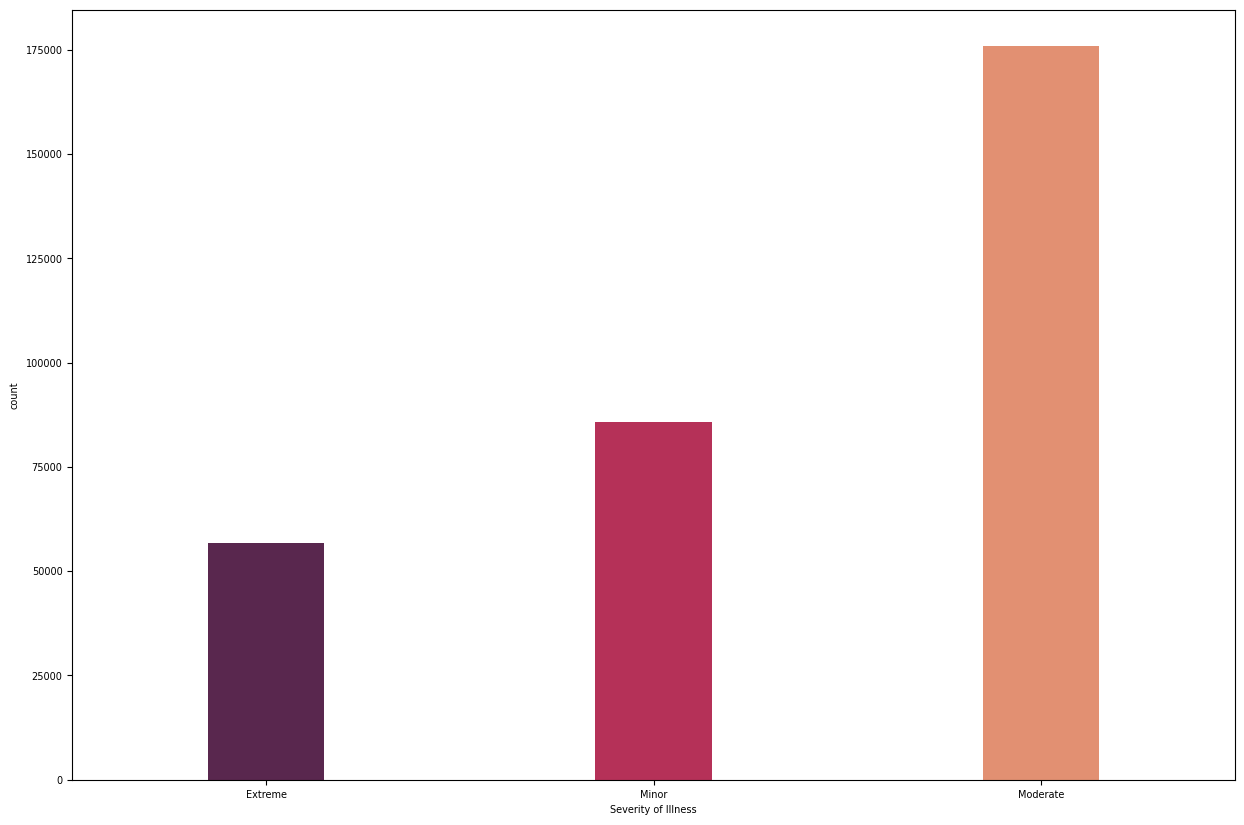

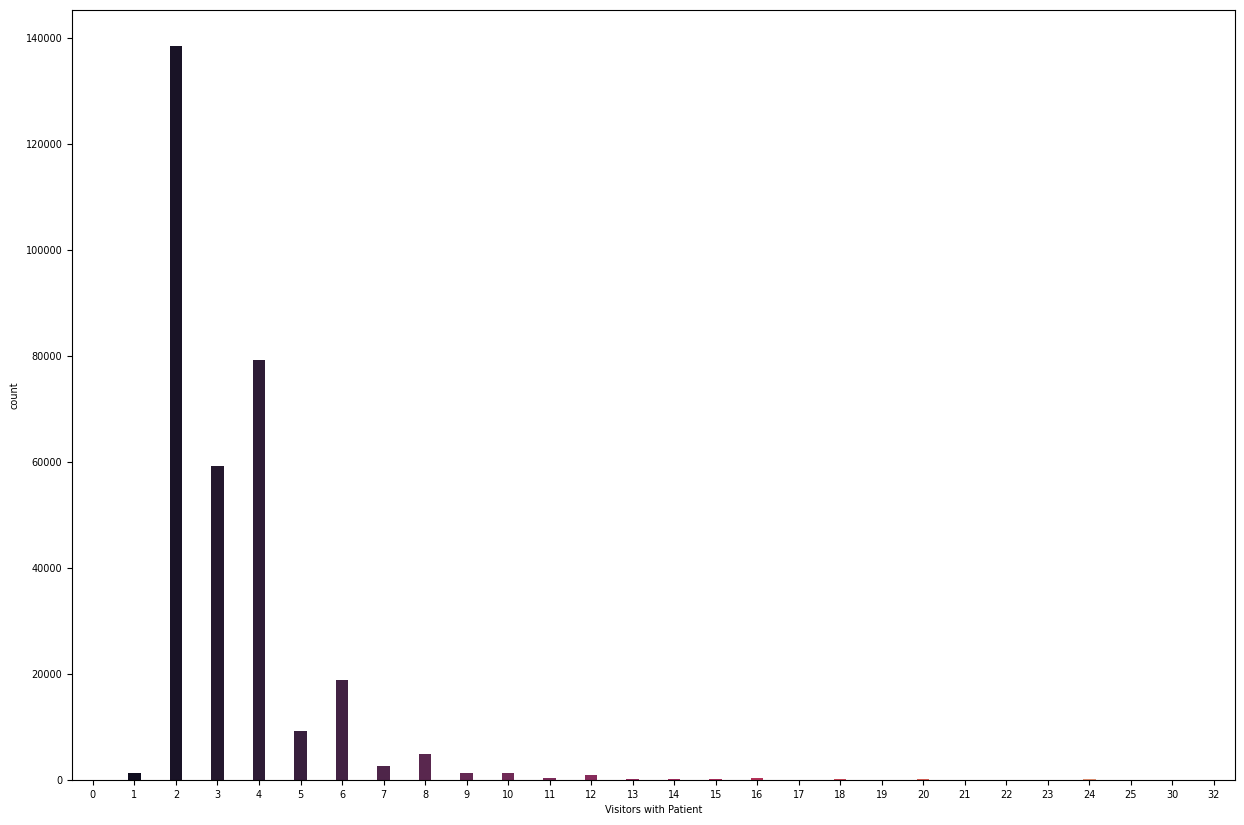

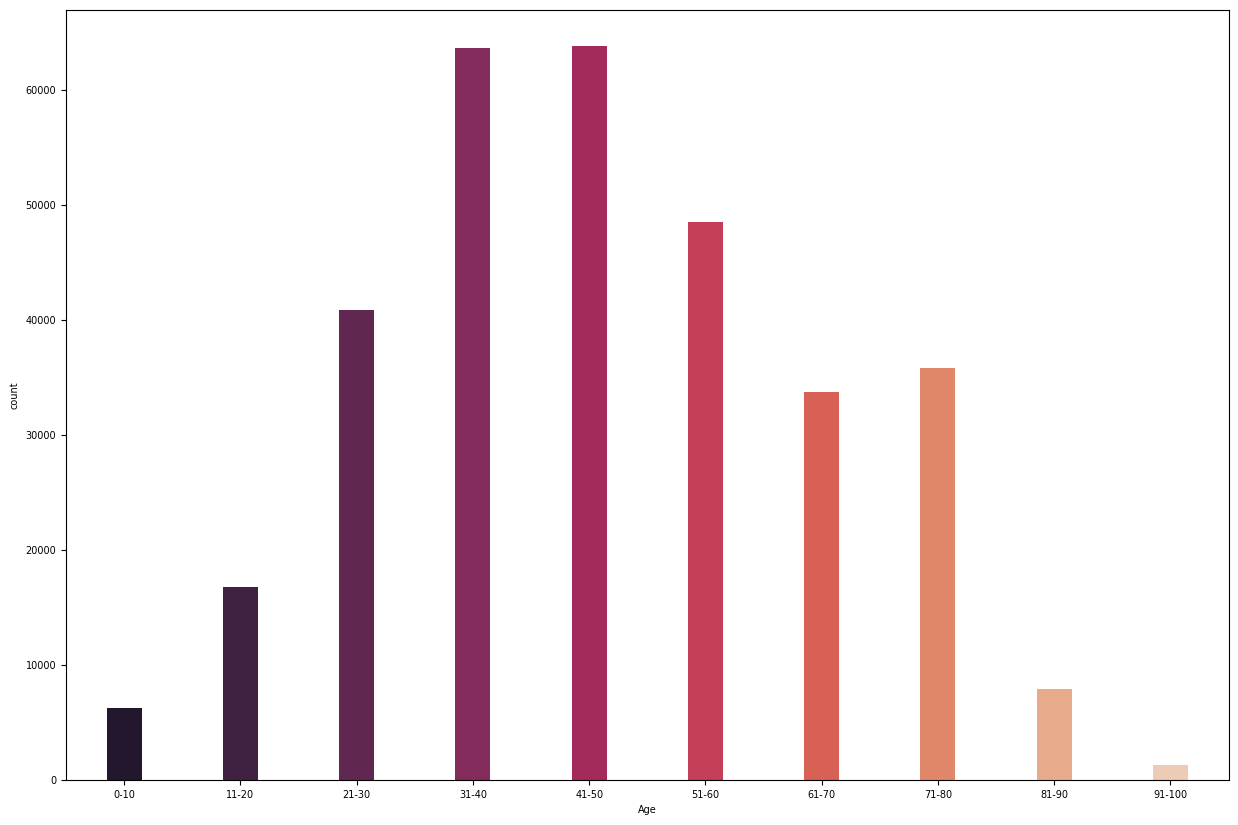

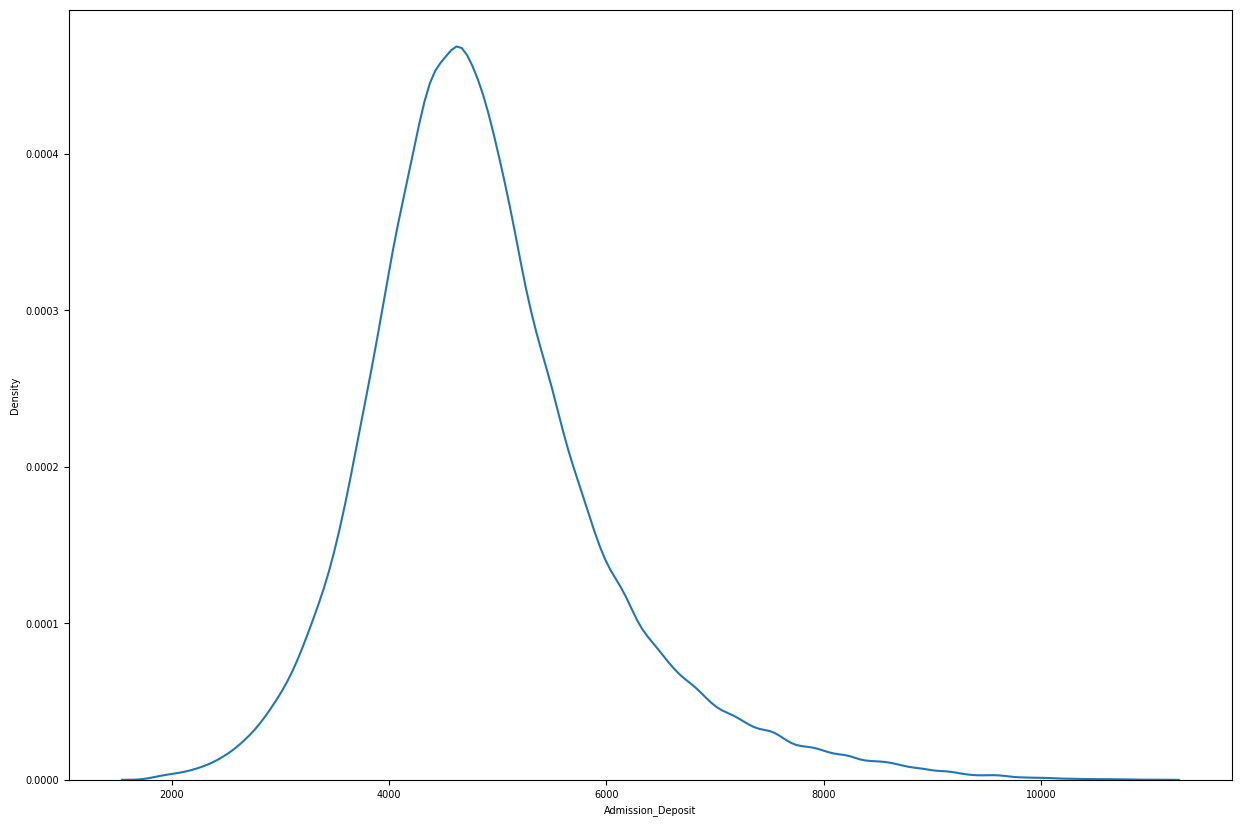

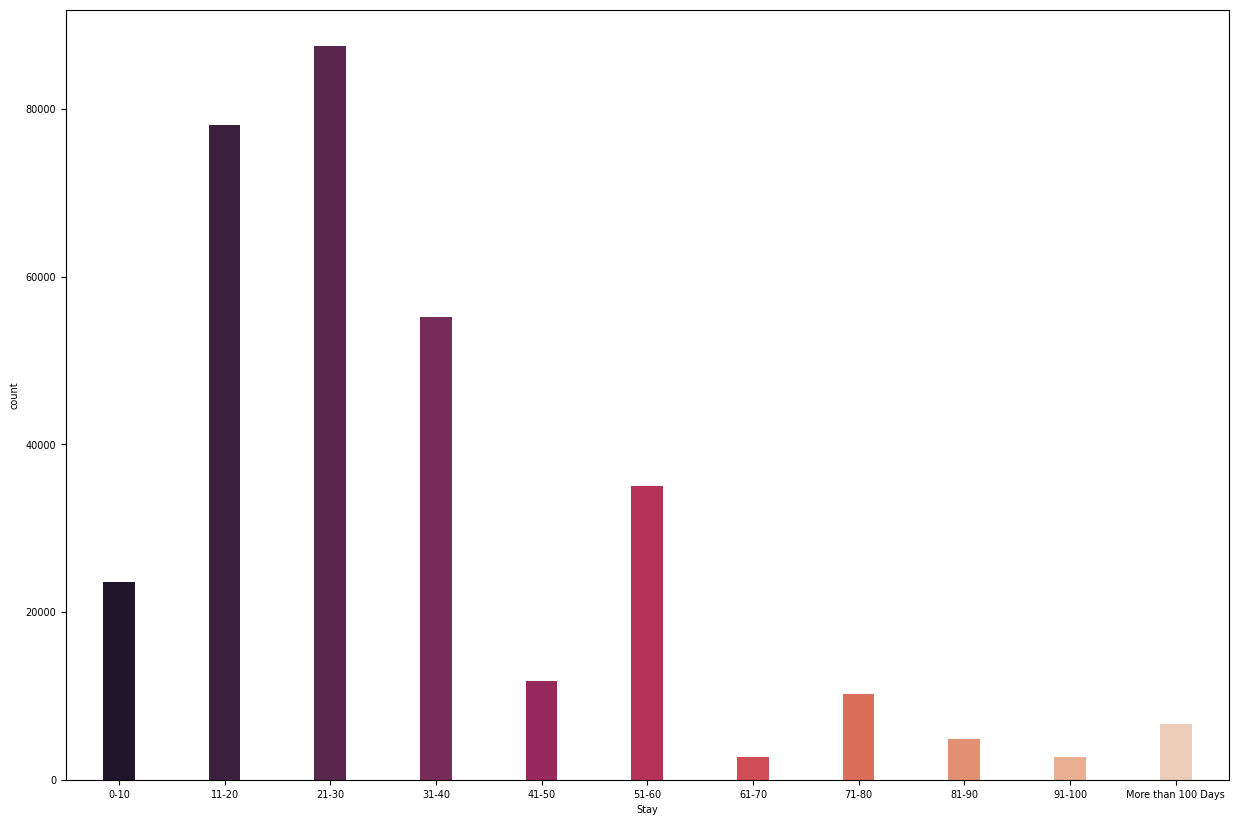

In [214]:
plot_dists(df_train.drop(['case_id', 'patientid'], axis=1))

There is high cardinality in categorical variables. Paiwise correlation needs to be assesed to try and trim predictors before 1 hot encoding


In [215]:
# categorical_columns = [
#     'Hospital_code',
#     'Hospital_type_code', 
#     'City_Code_Hospital',
#     'Hospital_region_code', 
#     'Department', 
#     'Ward_Type', 
#     'Ward_Facility_Code', 
#     'Bed Grade',
#     'City_Code_Patient', 
#     'Type of Admission',
#     'Severity of Illness', 
#     ]

categorical_columns = [
    'Hospital_code', 
    'Hospital_region_code', 
    'Department', 
    'Ward_Type', 
    'Ward_Facility_Code', 
    'Bed Grade',
    'City_Code_Patient', 
    'Type of Admission',
    'Severity of Illness', 
    ]

In [217]:


city_code_hospital = df_train['Hospital_region_code']
hospital_type_code = df_train['Hospital_code']

city_code_hospital = pd.factorize(city_code_hospital)[0]
hospital_type_code = pd.factorize(hospital_type_code)[0]

tab = pd.crosstab(city_code_hospital, hospital_type_code)

result = scs.chi2_contingency(tab)
result.pvalue

np.float64(0.0)

In [218]:
tab

col_0,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
row_0,,,,,,,,,,,,,,,,,,,,,
0,3663,5102,0,0,0,0,0,0,3671,11510,...,0,0,0,9257,0,5002,0,0,0,0
1,0,0,9435,0,26566,0,0,0,0,0,...,7992,5501,9834,0,0,0,0,1240,1306,0
2,0,0,0,33076,0,10703,5249,4277,0,0,...,0,0,0,0,17328,0,3630,0,0,1405


In [219]:
expected = pd.DataFrame(result.expected_freq)

In [ ]:
scs.contingency.association(tab)

1.0

In [ ]:
len(categorical_columns)

9

In [238]:
df_train_cat = df_train.apply(lambda x : pd.factorize(x)[0])+1
df_train_cat = df_train_cat[categorical_columns]

In [239]:
df_train_cat.head()

,Hospital_code,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness
0,1,1,1,1,1,1,1,1,1
1,2,1,1,2,1,1,1,2,1
2,3,2,2,2,2,1,1,2,1
3,4,3,1,1,3,1,1,2,1
4,4,3,1,2,3,1,1,2,1


In [240]:
# now aim to run this over every categorical to produce a table of p-vals, then make a heat map


def cramV_of_cols(df: pd.DataFrame, cols: list[str]):
    ''' 
    df must have factorized categories!
    '''
    # Iterate through each col, and calculalte pval with other cols

    cramVs = []

    for col1 in cols:
        cramVs_row = []

        for col2 in cols:

            cramVs_row.append(
                scs.contingency.association(
                    pd.crosstab(
                        df[col1],
                        df[col2]
                    ),
                    method='cramer',
                    correction=True
                )
            )

        cramVs.append(cramVs_row)

    return np.array(cramVs)


def chi2_of_cols(df: pd.DataFrame, cols: list[str]):
    ''' 
    df must have factorized categories!
    '''
    # Iterate through each col, and calculalte pval with other cols

    pvals = []

    for col1 in cols:
        pvals_row = []

        for col2 in cols:
            pvals_row.append(
                scs.chi2_contingency(
                    pd.crosstab(
                        df[col1],
                        df[col2]
                    )
                ).pvalue
            )



        pvals.append(pvals_row)

    return np.array(pvals)




In [241]:
result_chi = pd.DataFrame(chi2_of_cols(df_train_cat, categorical_columns), columns=df_train_cat.columns, index=df_train_cat.columns)
result_cram = pd.DataFrame(cramV_of_cols(df_train_cat, categorical_columns), columns=df_train_cat.columns, index=df_train_cat.columns)


<Axes: >

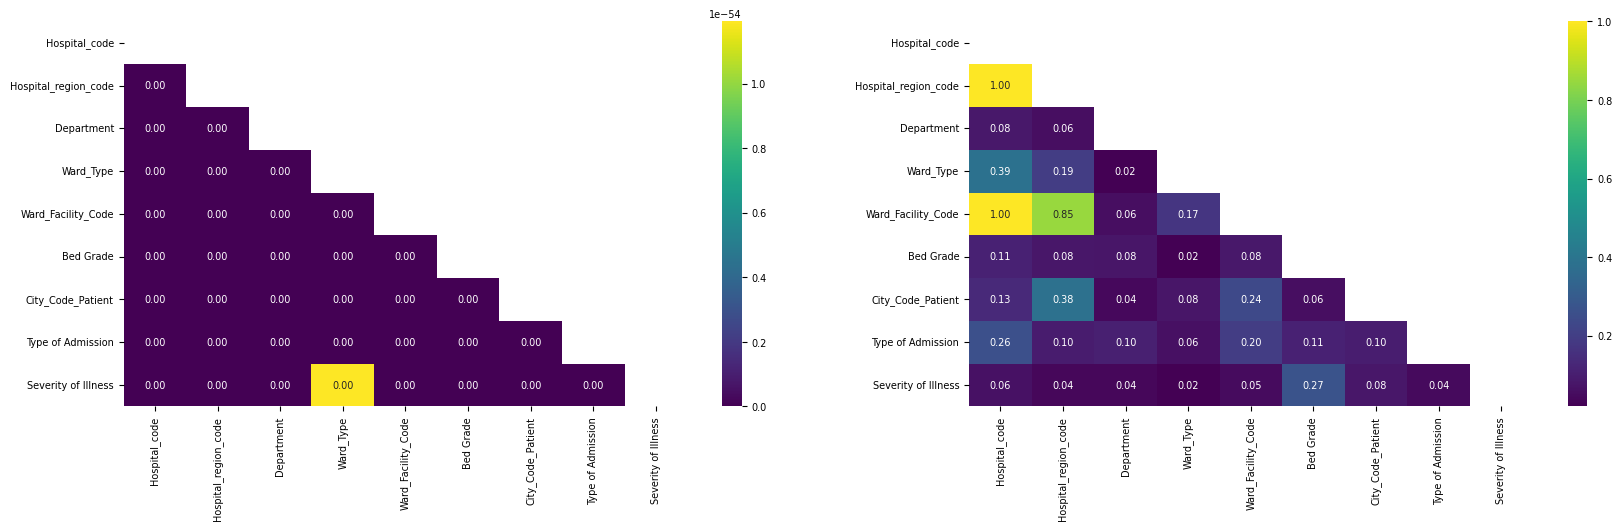

In [ ]:
mask = np.triu(np.ones_like(result_cram, dtype=bool))

fig, ax = plt.subplots(1,2, figsize=(20,5))
plt.rcParams.update({'font.size': 7})
heatmap(ax=ax[0], data=result_chi, mask=mask, annot=True, fmt=".2f", cmap = 'viridis')
heatmap(ax=ax[1], data=result_cram, mask=mask, annot=True, fmt=".2f", cmap = 'viridis')

In [247]:
def get_strong_associations(df: pd.DataFrame, threshold: float):
    '''
    Returns a list of lists, representing pairs of categorical variables of a dataframe with a cramer's V above the supplied threshold. 
    '''

    col_names = df.columns

    if threshold < 0.0 or threshold > 1.0:
        raise ValueError('Threshold must be between 0 and 1')
    
    carmsV_df = pd.DataFrame(cramV_of_cols(df, df.columns), columns=df.columns, index=df.columns)
    mask = np.triu(np.ones_like(carmsV_df, dtype=bool))

    strong_associations = []

    for i, row in enumerate(carmsV_df.iterrows()):

        for j, V in enumerate(row[1]):
            
            if not mask[i][j]:
                continue 

            if i == j:
                continue

            elif V > 0.75:

                strong_associations.append([col_names[i], col_names[j]])

    return strong_associations
    

In [248]:
result = get_strong_associations(df_train_cat[categorical_columns], 0.75)
result

[['Hospital_code', 'Hospital_region_code'],
 ['Hospital_code', 'Ward_Facility_Code'],
 ['Hospital_region_code', 'Ward_Facility_Code']]

Aim now is to factorize hospital region code and ward facility code into a single variable, and then transform the columns to reflect this new variable in the data

In [250]:
pd.crosstab(df_train['Hospital_region_code'], df_train['Ward_Facility_Code'])

Ward_Facility_Code,A,B,C,D,E,F
Hospital_region_code,,,,,,
X,0,0,0,0,55351,77985
Y,0,35156,35463,51809,0,0
Z,27906,0,0,0,0,34768


In [279]:
find_category_paths(df_train, ['Hospital_region_code', 'Ward_Facility_Code'])

['X_E', 'X_F', 'Y_B', 'Y_C', 'Y_D', 'Z_A', 'Z_F']

In [283]:
(df_train['Hospital_region_code'] + "_" + df_train['Ward_Facility_Code']).unique()

array(['Z_F', 'X_E', 'Y_D', 'X_F', 'Y_B', 'Z_A', 'Y_C'], dtype=object)

In [288]:
pd.get_dummies((df_train['Hospital_region_code'] + "_" + df_train['Hospital_code'].astype(str)).unique())

,X_10,X_14,X_17,X_23,X_24,X_25,X_28,X_29,X_4,X_5,...,Z_13,Z_15,Z_16,Z_2,Z_21,Z_3,Z_30,Z_31,Z_8,Z_9
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
